# <center> Travel Insurance Prediction
<center> by Vicky Tanamal

# Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [30]:
data = 'TravelInsurancePrediction.csv'
df = pd.read_csv(data, index_col=0)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


# Exploring Data

In [31]:
df.shape

(1987, 9)

In [32]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


In [34]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [35]:
df['ChronicDiseases'] = df['ChronicDiseases'].map({0: "No", 1: "Yes"})
df['TravelInsurance'] = df['TravelInsurance'].map({0: "Not purchased", 1: "Purchased"})

In [36]:
df.select_dtypes(include='object').nunique()

Employment Type        2
GraduateOrNot          2
ChronicDiseases        2
FrequentFlyer          2
EverTravelledAbroad    2
TravelInsurance        2
dtype: int64

In [37]:
df.select_dtypes(exclude='object').nunique()

Age              11
AnnualIncome     30
FamilyMembers     8
dtype: int64

# Define Target Variable / Labelling

Target Variable for this case is TravelInsurance, because we want to know whether customers purchase the TravelInsurance or not. 

In [38]:
df['TravelInsurance'].value_counts(normalize = True) * 100

Not purchased    64.26774
Purchased        35.73226
Name: TravelInsurance, dtype: float64

We can see most of customers do not purchase TravelInsurance 

# Data Cleaning and Processing

We already checked the data before and there is no missing data

# Exploratory Data Analysis

In [39]:
cats = []
nums = []
for i in df.columns:
    if df[i].dtype == 'object':
        cats.append(i)
    else:
        nums.append(i)
print('cats =', cats)
print('nums =', nums)

cats = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
nums = ['Age', 'AnnualIncome', 'FamilyMembers']


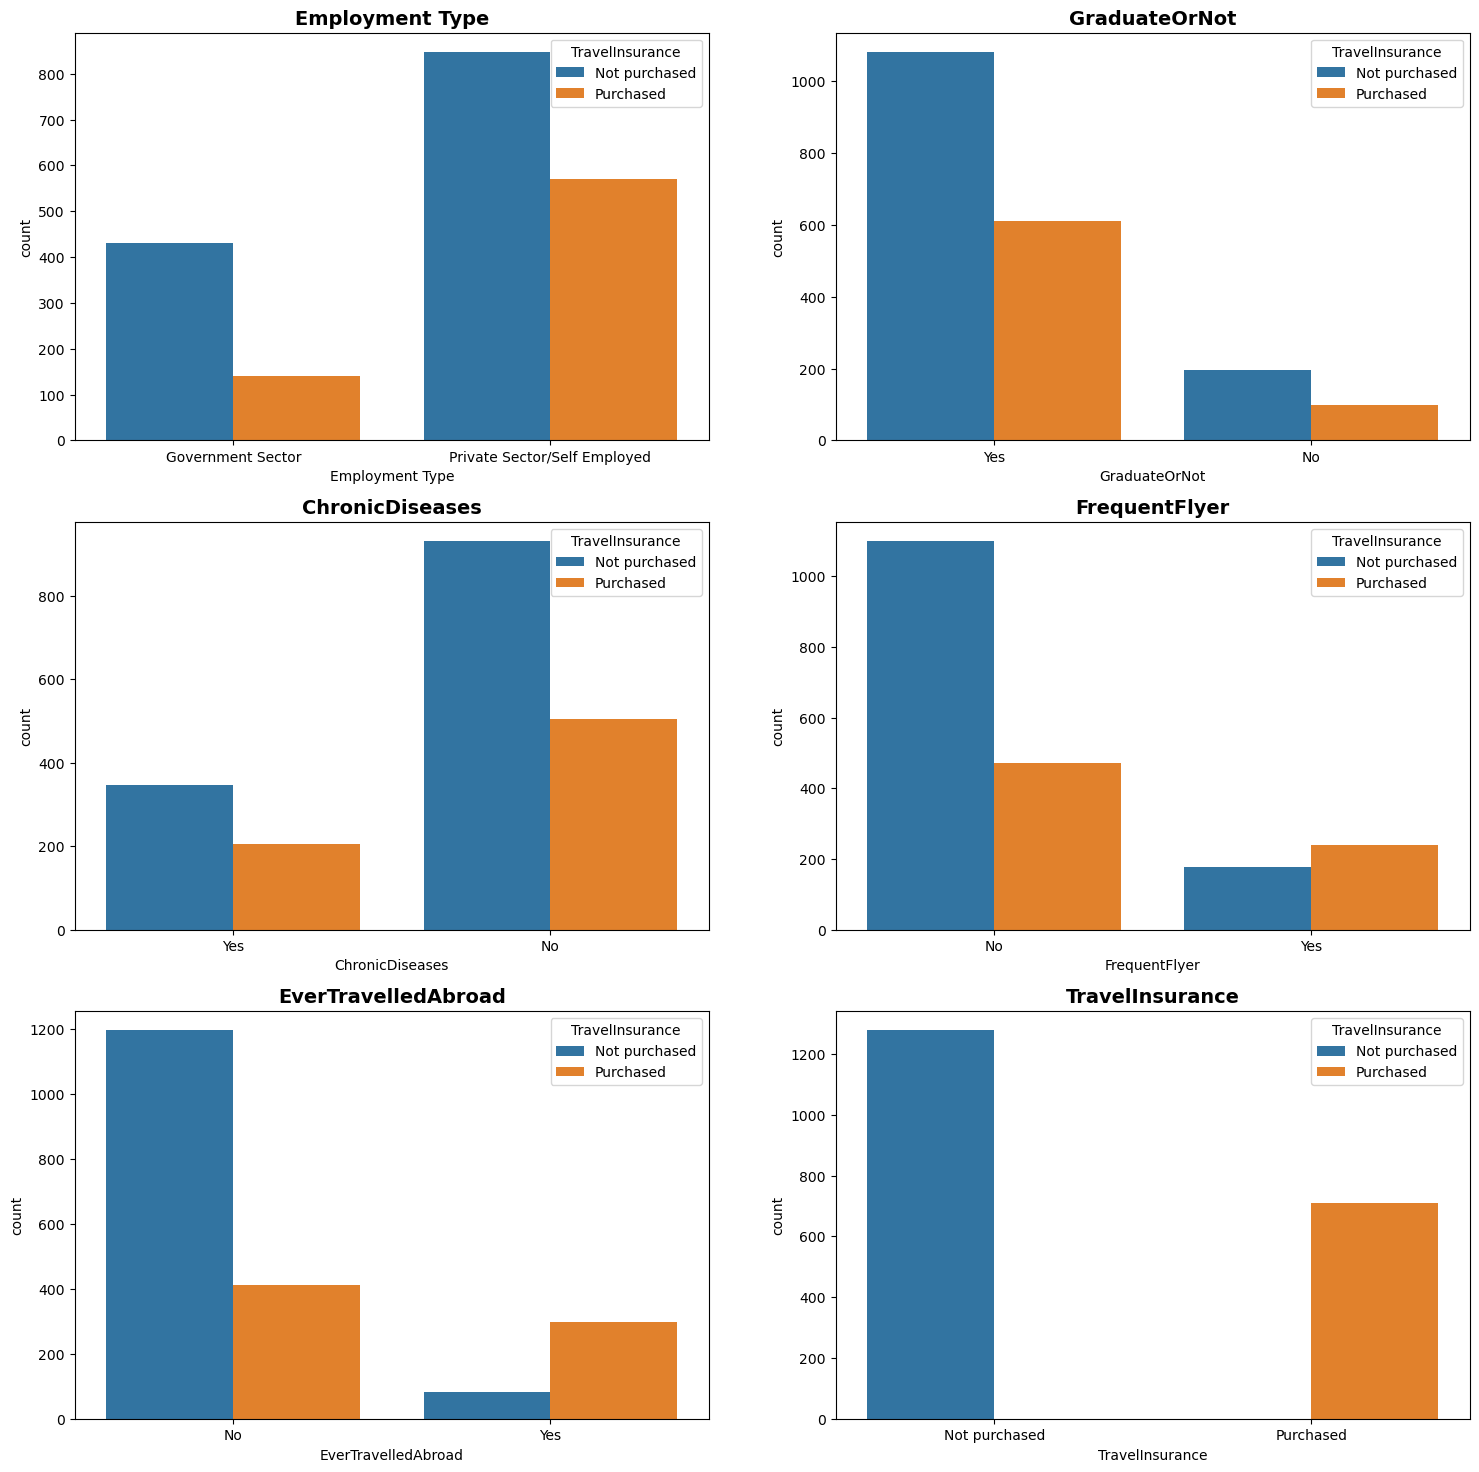

In [40]:
# Categorical
plt.figure(figsize=(18,18))
for i in range(0, len(cats)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cats[i]], hue = df['TravelInsurance'])
    # Set plot title
    plt.title(cats[i], weight='bold', fontsize = 14)

- Both customer that work in Goverment or Private Sector tend to not buy Travel Insurance. But in ratio to buy Travel Insurance in Private Sector is higher than Goverment.
- Both customer that Graduate or not tend to not buy Travel Insurance
- Having ChronicDiseases or not does not influence customer will buy Travel Insurance
- Frequent flyer tend to buy Travel Insurance
- Customer who ever travelled aboard tend to buy Travel Insurance

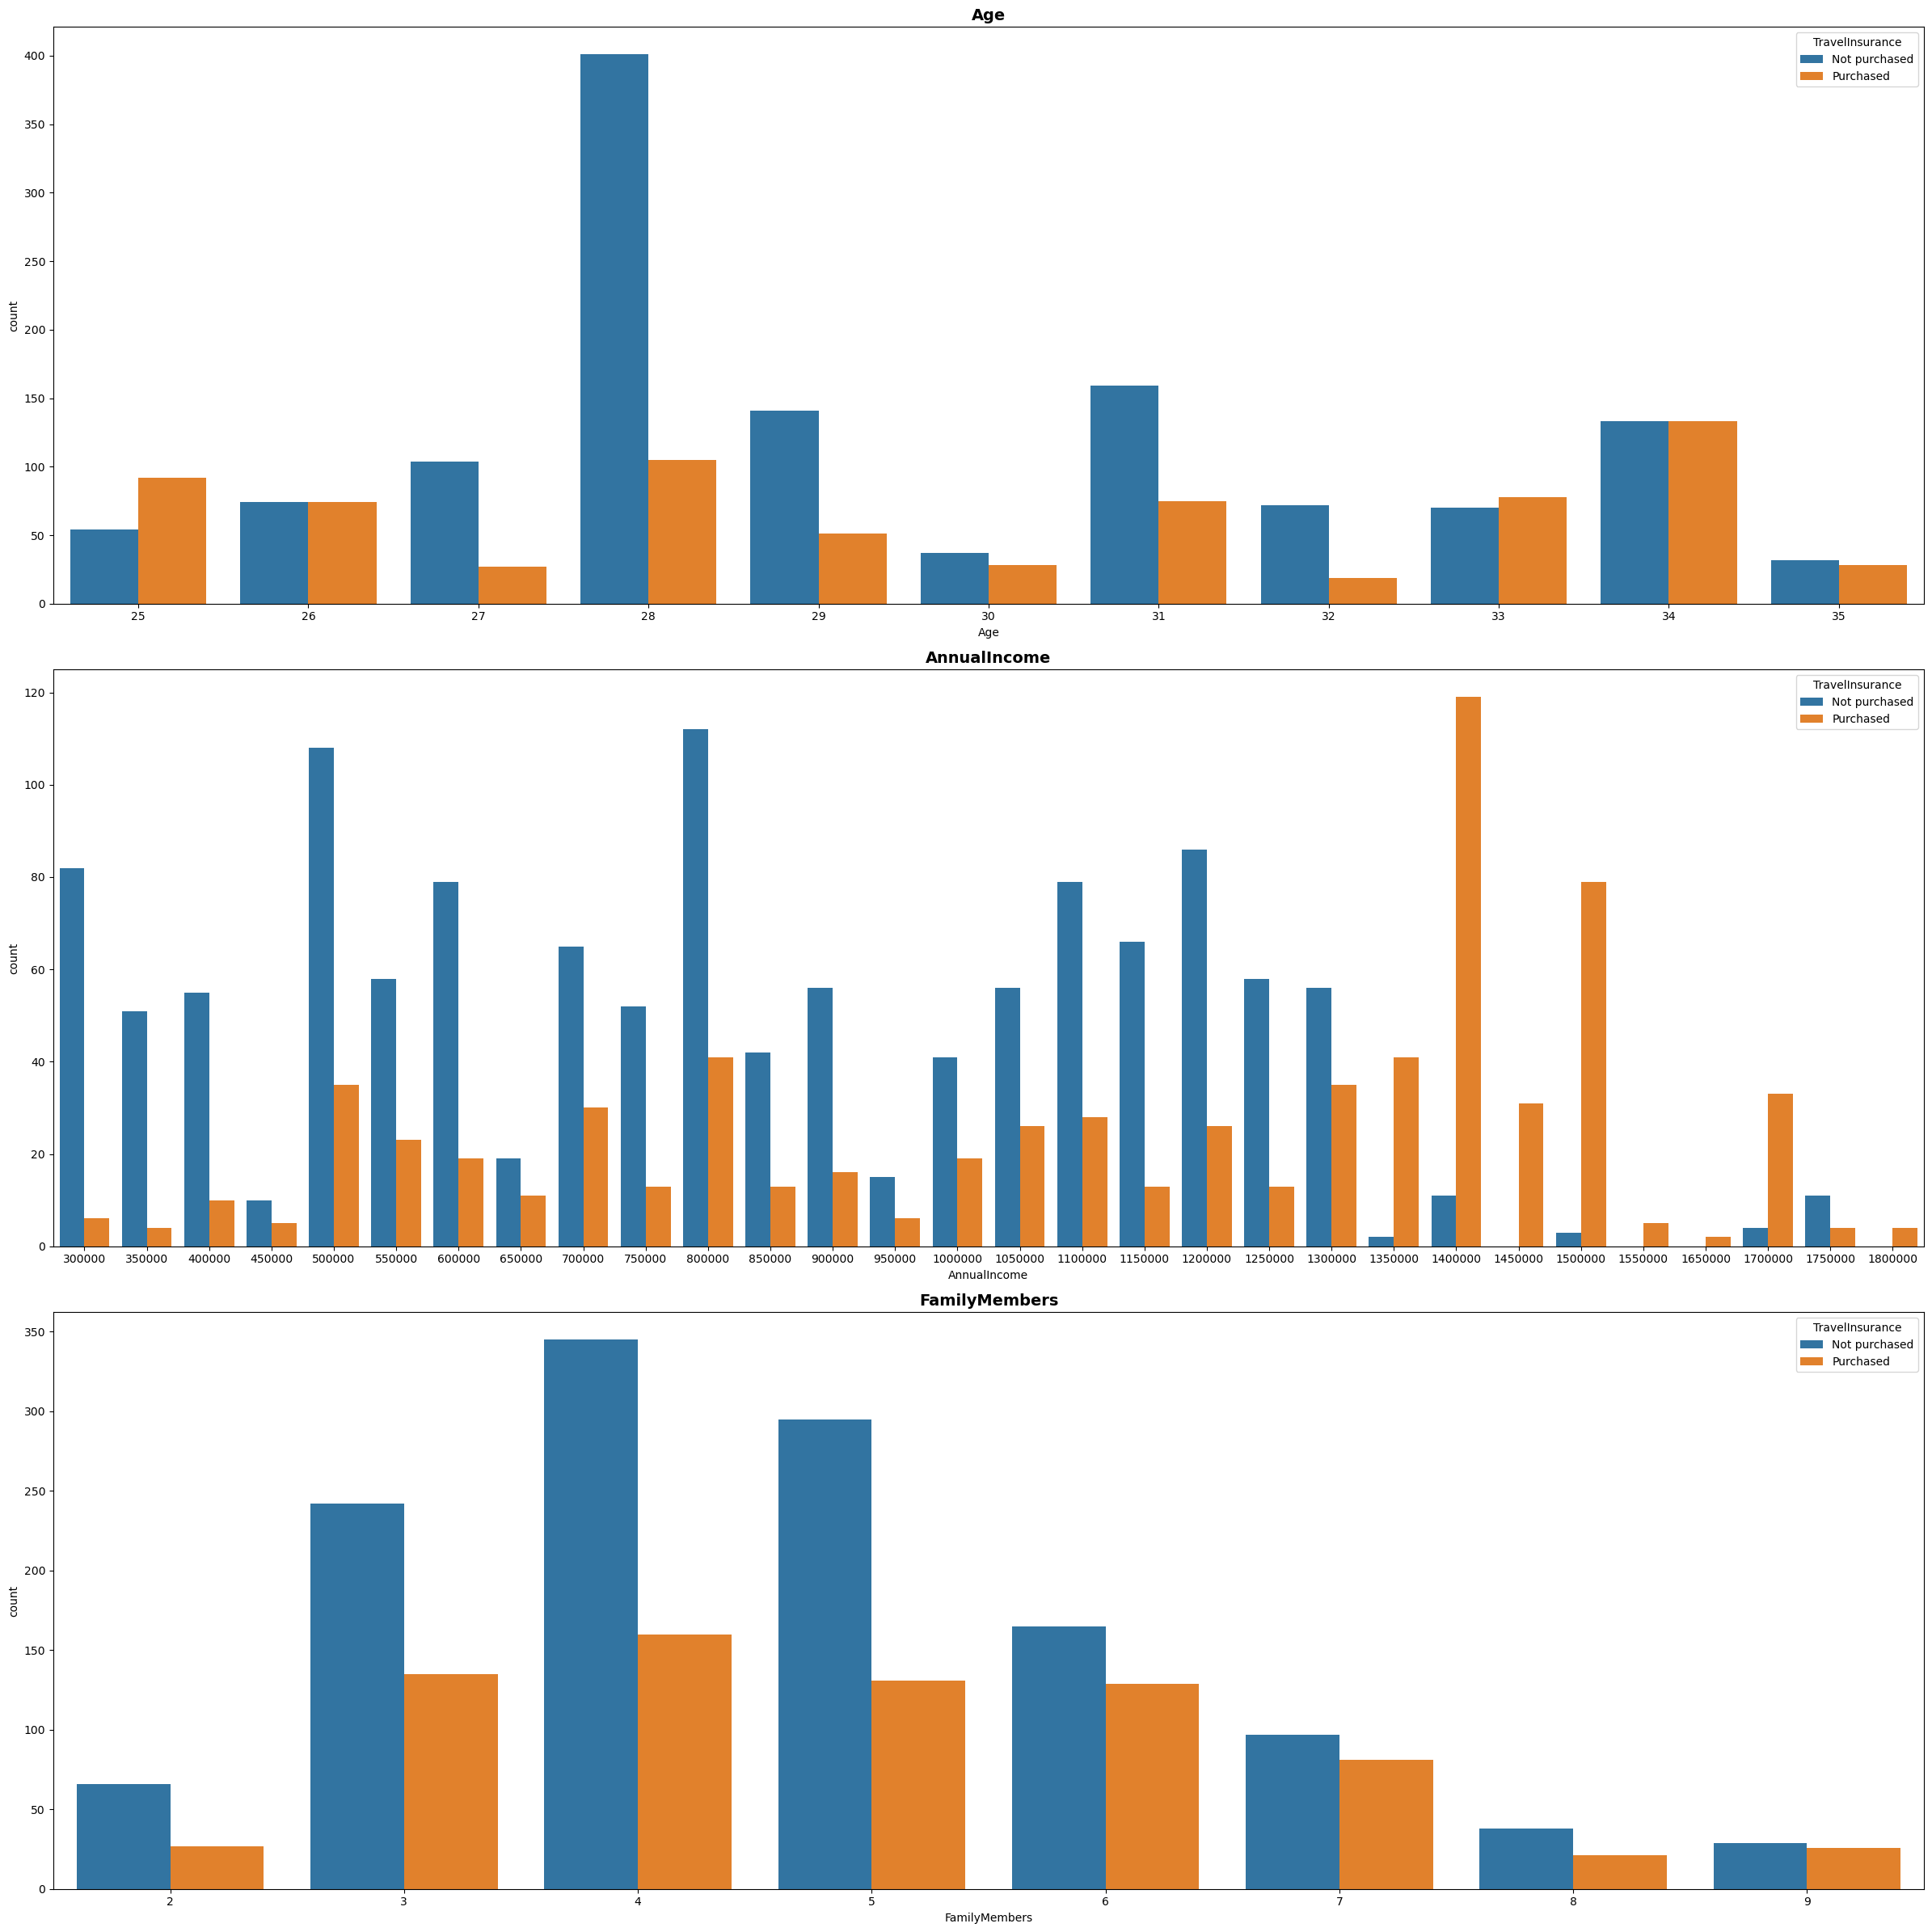

In [41]:
# Numerical
plt.figure(figsize=(24,24))
for i in range(0, len(nums)):
    plt.subplot(3,1,i+1)
    sns.countplot(data=df, x=df[nums[i]], hue = df['TravelInsurance'])
    # Set plot title
    plt.title(nums[i], weight='bold', fontsize = 14)
    # Rotate x-tick labels 90 degrees
    #plt.xticks(rotation=15)
    plt.tight_layout()

- Customers who younger than 27 years old and older than 32 years old tend to buy Travel Insurance
- Customers who earn income more than 1,35 M tend to buy Travel Insurance
- There is no clear trend whether customer who has more family member will buy the Travel Insurance

# Feature Engineering

In [42]:
# Explore AnnualIncome columns
df['AnnualIncome'].describe()

count    1.987000e+03
mean     9.327630e+05
std      3.768557e+05
min      3.000000e+05
25%      6.000000e+05
50%      9.000000e+05
75%      1.250000e+06
max      1.800000e+06
Name: AnnualIncome, dtype: float64

In [43]:
# Categorizing AnnualIncome
bins = [0, 600000, 1250000, 1800000] # 0-600.000 -> low / 600.001 - 1.250.000 -> med / 1.250.001 - 1.800.000 -> high
groupNames = ["low", "med", "high"]
df['CatAnIncome'] = pd.cut(df['AnnualIncome'], bins, labels = groupNames, include_lowest = True)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,CatAnIncome
0,31,Government Sector,Yes,400000,6,Yes,No,No,Not purchased,low
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,Not purchased,med
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,Purchased,low
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,Not purchased,med
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,Not purchased,med
...,...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,No,Yes,Yes,Purchased,high
1983,28,Private Sector/Self Employed,Yes,1750000,5,Yes,No,Yes,Not purchased,high
1984,28,Private Sector/Self Employed,Yes,1150000,6,Yes,No,No,Not purchased,med
1985,34,Private Sector/Self Employed,Yes,1000000,6,No,Yes,Yes,Purchased,med


<Axes: xlabel='CatAnIncome', ylabel='count'>

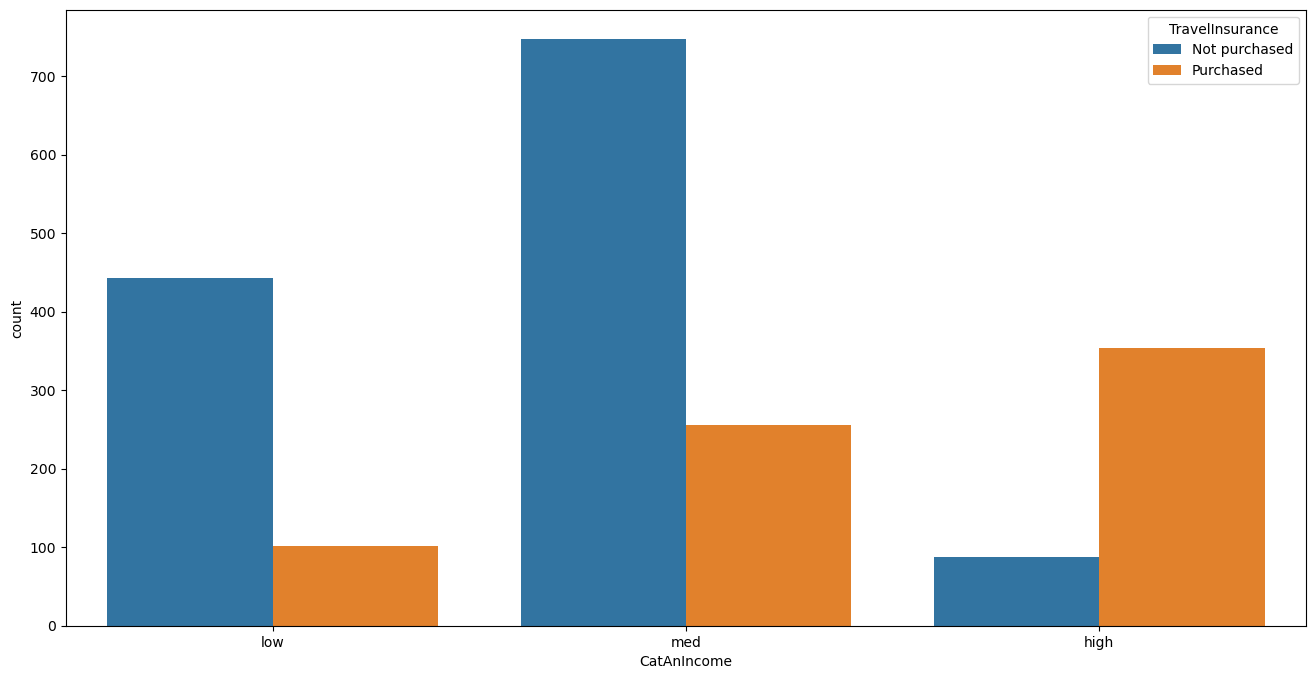

In [44]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x=df['CatAnIncome'], hue=df['TravelInsurance'])

Customers who have high income tend to buy Travel Insurance

In [45]:
# Label Encoding for categorical features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
to_encode = ['Employment Type','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad','TravelInsurance','CatAnIncome']
for index in to_encode:
    df[index] = le.fit_transform(df[index])

In [46]:
# Drop Annual Income features
df = df.drop(columns=['AnnualIncome'])

In [47]:
df.head()

,Age,Employment Type,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,CatAnIncome
0,31,0,1,6,1,0,0,0,1
1,31,1,1,7,0,0,0,0,2
2,34,1,1,4,1,0,0,1,1
3,28,1,1,3,1,0,0,0,2
4,28,1,1,8,1,1,0,0,2


# Modelling

In [48]:
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance']

In [49]:
# Splitting the data into X train, X test and y train, y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1589, 8), (398, 8), (1589,), (398,))

In [51]:
# Metrics for Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.4f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.4f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.4f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.4f" % f1_score(y_test, y_pred))
    
    print("ROC AUC (Test-proba): %.4f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC AUC (Train-proba): %.4f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

# Train Model

## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.7965
Precision (Test Set): 0.7542
Recall (Test Set): 0.6312
F1-Score (Test Set): 0.6873
ROC AUC (Test-proba): 0.7789
ROC AUC (Train-proba): 0.9529


## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
eval_classification(lr)

Accuracy (Test Set): 0.7638
Precision (Test Set): 0.7831
Recall (Test Set): 0.4610
F1-Score (Test Set): 0.5804
ROC AUC (Test-proba): 0.7471
ROC AUC (Train-proba): 0.7557


C:\Users\VickTan\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
eval_classification(tree)

Accuracy (Test Set): 0.7990
Precision (Test Set): 0.7652
Recall (Test Set): 0.6241
F1-Score (Test Set): 0.6875
ROC AUC (Test-proba): 0.7362
ROC AUC (Train-proba): 0.9575


## Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
eval_classification(gb)

Accuracy (Test Set): 0.8392
Precision (Test Set): 0.9529
Recall (Test Set): 0.5745
F1-Score (Test Set): 0.7168
ROC AUC (Test-proba): 0.8100
ROC AUC (Train-proba): 0.8661


# Hyperparameter Tuning 

Because of Random Forest and Gradient Boosting have the best result, we will focus on that model.

## Random Forest

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 200, 300],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300]
}

cv = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
cv.fit(X_train, y_train)
best_params = cv.best_params_
print('The best params are:',best_params)

The best params are: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 300, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}


In [60]:
tuned_rf = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=300, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100)
tuned_rf.fit(X_train, y_train)
y_pred = tuned_rf.predict(X_test)
eval_classification(tuned_rf)

Accuracy (Test Set): 0.8417
Precision (Test Set): 0.9535
Recall (Test Set): 0.5816
F1-Score (Test Set): 0.7225
ROC AUC (Test-proba): 0.7987
ROC AUC (Train-proba): 0.8982


## Gradient Boosting

In [58]:
param_grid = {
    "n_estimators":[1,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3)
cv.fit(X_train,y_train)
best_params = cv.best_params_
print('The best params are:',best_params)

The best params are: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}


In [59]:
tuned_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=250)
tuned_gb.fit(X_train, y_train)
y_pred = tuned_gb.predict(X_test)
eval_classification(tuned_gb)

Accuracy (Test Set): 0.8442
Precision (Test Set): 0.9647
Recall (Test Set): 0.5816
F1-Score (Test Set): 0.7257
ROC AUC (Test-proba): 0.8096
ROC AUC (Train-proba): 0.8688


From the result, Both Gradient Boosting has higher accuracy than Random Forest 84.42%. For ROC AUC Test and Train Gradient Boosting is better than Random Forest. Although the training set performance is slightly lower, the fact that the test set performance is higher suggests that the model is better at generalizing to new, unseen data. This indicates that the model is less likely to be overfitting and is capturing more meaningful patterns in the data. So, the best model for this case is Gradient Boosting.
